In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Load Dataset
dataset = pd.read_csv('./iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#Set x and y variable
x = dataset.drop('species', axis=1).values
y = dataset['species']

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
data_transformed=sc.transform(x)

In [4]:
#Optimized Number of Cluster and Associated Silhouette Coefficient - Kmeans

# Set initial silhouette score
sil_score = [0]
k_value = [0]

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster,random_state=100).fit(data_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')

    # If statement to find optimal Silhouette Score
    if sil_score <= sil_coeff:
        
        # Add Optimal Silhouette Coefficient and K-Value
        sil_score.clear()
        k_value.clear()
        sil_score.append(float(sil_coeff))
        k_value.append(float(n_cluster)) 
        
opt_clusters = int(np.asarray(k_value))
opt_silscore = float(np.asarray(sil_score))
print('Optimized n_clusters = {}, Silhouette Coefficient = {:.2f}'.format(opt_clusters, opt_silscore))

Optimized n_clusters = 2, Silhouette Coefficient = 0.58


In [5]:
#Create KMeans with Clusters
kmeans = KMeans(n_clusters = opt_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)

#Apply KMeans clustering
y_kmeans = kmeans.fit_predict(x)

#Create Revised Dataset
dataset2=dataset.drop('species', axis=1)
dataset2['kmeans_pred'] = y_kmeans
dataset2['kmeans_pred'] = dataset2['kmeans_pred'].map({0:'Cluster 1', 1:'Cluster 2'}) 
dataset2.head()

,sepal_length,sepal_width,petal_length,petal_width,kmeans_pred
0,5.1,3.5,1.4,0.2,Cluster 1
1,4.9,3.0,1.4,0.2,Cluster 1
2,4.7,3.2,1.3,0.2,Cluster 1
3,4.6,3.1,1.5,0.2,Cluster 1
4,5.0,3.6,1.4,0.2,Cluster 1


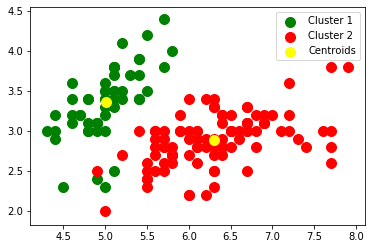

In [6]:
#Plot of Clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [7]:
#Optimized Number of Cluster and Associated Silhouette Coefficient - GMM
from sklearn.mixture import GaussianMixture

# Set initial silhouette score
sil_scoregmm = [0]
k_valuegmm = [0]

for n_clustergmm in range(2, 10):
    gmm = GaussianMixture(n_components=n_clustergmm,random_state=100).fit_predict(data_transformed)
    labelgmm = gmm
    sil_coeffgmm = silhouette_score(data_transformed, labelgmm, metric='euclidean')

    # If statement to find optimal Silhouette Score
    if sil_scoregmm <= sil_coeffgmm:
        
        # Add Optimal Silhouette Coefficient and K-Value
        sil_scoregmm.clear()
        k_valuegmm.clear()
        sil_scoregmm.append(float(sil_coeffgmm))
        k_valuegmm.append(float(n_clustergmm)) 
        
opt_clustersgmm = int(np.asarray(k_valuegmm))
opt_silscoregmm = float(np.asarray(sil_scoregmm))
print('Optimized n_components= {}, Silhouette Coefficient is {:.2f}'.format(opt_clustersgmm, opt_silscoregmm))

Optimized n_components= 2, Silhouette Coefficient is 0.58


In [8]:
#Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=opt_clustersgmm,random_state=100)
gmm.fit(x)
y_gmm = gmm.predict(x)

#Create Revised Dataset
dataset3=dataset.drop('species', axis=1)
dataset3['gmm_pred'] = y_gmm
dataset3['gmm_pred'] = dataset3['gmm_pred'].map({0:'Cluster 1', 1:'Cluster 2'}) 
dataset3.head()

,sepal_length,sepal_width,petal_length,petal_width,gmm_pred
0,5.1,3.5,1.4,0.2,Cluster 1
1,4.9,3.0,1.4,0.2,Cluster 1
2,4.7,3.2,1.3,0.2,Cluster 1
3,4.6,3.1,1.5,0.2,Cluster 1
4,5.0,3.6,1.4,0.2,Cluster 1


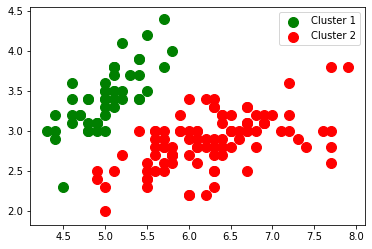

In [9]:
#Plot of Clusters
plt.scatter(x[y_gmm == 0, 0], x[y_gmm == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(x[y_gmm == 1, 0], x[y_gmm == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.legend()

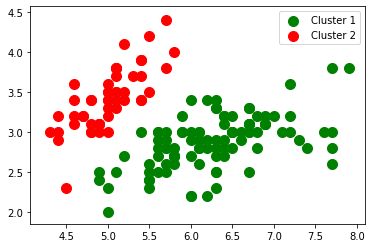

In [10]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_allgo=cluster.fit_predict(x)

#Plot of Clusters
plt.scatter(x[y_allgo == 0, 0], x[y_allgo == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(x[y_allgo == 1, 0], x[y_allgo == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.legend()

In [11]:
#Create Revised Dataset
dataset4=dataset.drop('species', axis=1)
dataset4['allgo_pred'] = y_allgo
dataset4['allgo_pred'] = dataset4['allgo_pred'].map({0:'Cluster 1', 1:'Cluster 2'}) 
dataset4.head()

,sepal_length,sepal_width,petal_length,petal_width,allgo_pred
0,5.1,3.5,1.4,0.2,Cluster 2
1,4.9,3.0,1.4,0.2,Cluster 2
2,4.7,3.2,1.3,0.2,Cluster 2
3,4.6,3.1,1.5,0.2,Cluster 2
4,5.0,3.6,1.4,0.2,Cluster 2


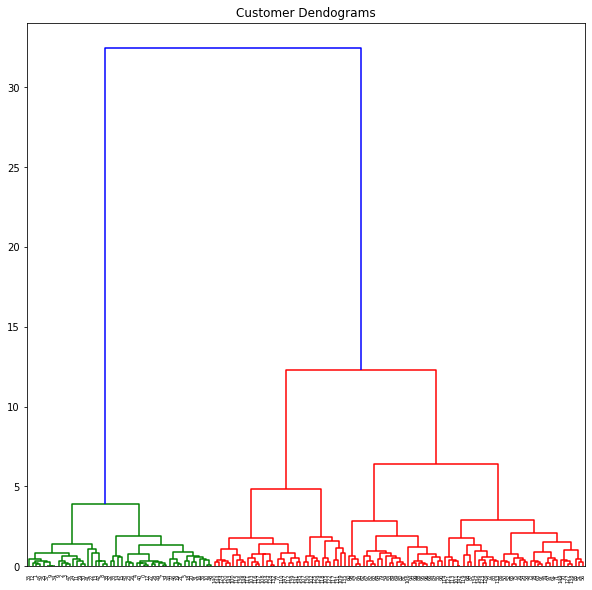

In [12]:
#Plot Denogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))  

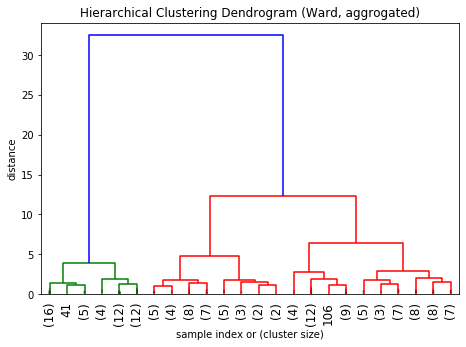

In [13]:
#Truncated Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(x, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()